In [35]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

def square(x):
  return x**2

print(square(5))

25


In [36]:
def derivative(f, x, h=1e-4):
  fx1 = f(x-h)
  fx2 = f(x+h)
  return (fx2 - fx1) / (2*h)

print(derivative(square, 0))
print(derivative(square, 1))

0.0
1.9999999999992246


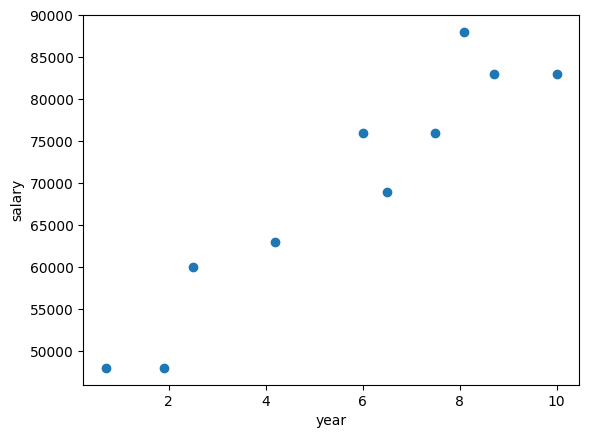

In [37]:
salary_and_year = [[83000, 8.7],
                  [88000, 8.1],
                  [48000, 0.7],
                  [76000, 6],
                  [69000, 6.5],
                  [76000, 7.5],
                  [60000, 2.5],
                  [83000, 10],
                  [48000, 1.9],
                  [63000, 4.2]]
data = torch.Tensor(salary_and_year)
salaries = data[:, 0]
years = data[:, 1]
plt.scatter(years, salaries)
plt.xlabel('year')
plt.ylabel('salary')
A = torch.stack([years, torch.ones(years.shape)], axis=1)
s = salaries

In [38]:
guess = torch.Tensor([1000, 10000])
print(guess)
s_hat = A.matmul(guess)
print(s_hat)
print(s)
errors = s - s_hat
loss = errors.t().matmul(errors) / A.shape[0]
print(errors)
print(loss)

def compute_error(current_model, A, s):
    errors = s - A.matmul(current_model)
    
    return errors.t().matmul(errors) / A.shape[0]

tensor([ 1000., 10000.])
tensor([18700., 18100., 10700., 16000., 16500., 17500., 12500., 20000., 11900.,
        14200.])
tensor([83000., 88000., 48000., 76000., 69000., 76000., 60000., 83000., 48000.,
        63000.])
tensor([64300., 69900., 37300., 60000., 52500., 58500., 47500., 63000., 36100.,
        48800.])
tensor(3.0100e+09)


100%|██████████| 10000/10000 [00:08<00:00, 1178.37it/s]


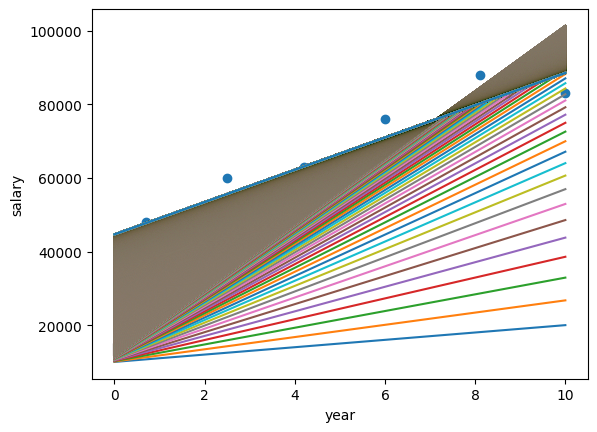

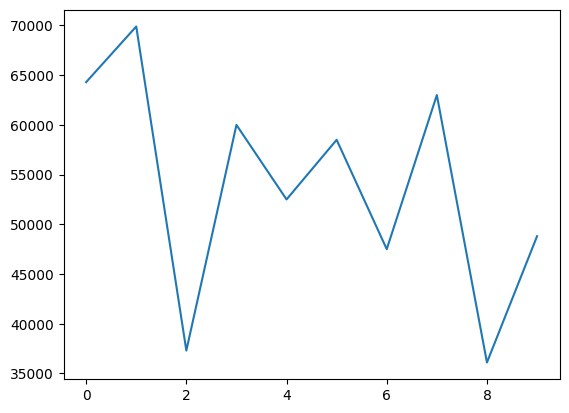

tensor(48800.)
tensor([ 4390.2739, 44673.5625])


In [39]:
xi = torch.Tensor([1000, 10000])
step_size = 1e-3
xis = [xi]
plt.plot((0, 10), (xi[1], xi[0]*10+xi[1]))
losses = []
xi.requires_grad = True
optimizer = torch.optim.SGD([xi], lr=1e-3)
for i in trange(10000):
    xi.requires_grad = True
    loss = compute_error(xi, A, s)
    optimizer.zero_grad()
    loss.backward()
    xi = (xi - xi.grad * step_size).detach()
    optimizer.step()
    xis.append(xi)
    losses.append(loss)
    plt.plot((0, 10), (xi[1], xi[0]*10+xi[1]))
plt.scatter(years, salaries)
plt.xlabel('year')
plt.ylabel('salary')
plt.show()
plt.plot(range(len(errors)), errors)
plt.show()
print(errors[-1])
print(xi)